In [1]:
# simple linear model https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from   sklearn.linear_model    import LogisticRegression

# visualisation
from   matplotlib              import pyplot as plt

# train test split helper function https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from   sklearn.model_selection import train_test_split        

# data reading package https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html
import pandas as pd

import warnings

warnings.filterwarnings('ignore')

## Data Reading

In [2]:
# transpose your data such that strains are the rows and unitig as the columns (repeated first row so ignore it with skiprows = 1)
df             = pd.read_csv('data/Sflex_countsMAF0.05_dedup2381_uniqpatout.txt.gz', sep = '\t', skiprows = 1).set_index('pattern_id').T

# append aligned target
df['target']   = pd.read_csv('data/Sflex_fullmar_1000B_y1_2381dedup_pheno.txt', sep = '\t').set_index('sample')

# preview head of the data
df.head()

pattern_id,2490382,2488984,2488605,4138199,2488778,2488777,1709327,2182947,4367239,2123900,...,22736,747965,671053,671169,402325,402387,718395,4564122,4564126,target
ERR042811,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR042822,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR042829,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR042836,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
ERR042837,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


## Defining the Train and Test Datasets

In [3]:
# define input and target output
X              = df.values[:,:-1]
y              = df.values[:,-1]

# split the data randomly (set random_state to control randomness for reproducible results)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, train_size = 0.75)

## Logistic Regression

In [4]:
# train model (set complexity parameter C to reduce over fitting)
model          = LogisticRegression(random_state = 0).fit(X_train, y_train)

# feature importance for a Logistic Regression model is based on the weight coefficients
weights        = model.coef_.flatten()

# train and test accuracy
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.9748322147651006)

#### Distribution of Coefficients

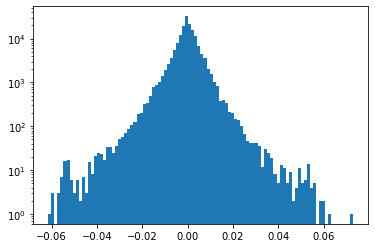

In [5]:
plt.hist(weights, bins = 100)
plt.yscale('log')
plt.show()

We can see that a lot of unitigs are non-informative with a few that stand out at either end of the histogram.

### unitig importance

In [6]:
# top 10 features indicating target = 0
display(df.columns[weights.argsort()[:10]])

# top 10 features indicating target = 1
display(df.columns[weights.argsort()[-10:]])

Index([4684951, 4767019, 4764916, 4684953,  897233,  106119,  106137, 4691445,
        241671,  143894],
      dtype='object', name='pattern_id')

Index([1015030, 1015049, 1015038, 1015032, 1015050, 1026168, 1013434,  960839,
       4674623, 1015916],
      dtype='object', name='pattern_id')